# 1. Approximation Methods
We are now going to look at approximation methods. Recall that in the last section, we discussed a major disadvantage to all of the methods we have studied so far. That is, they all require us to estimate the value function for each state, and in the case of the action-value function, we have to estimate it for each state and action pair. We learned early on that the state space can grow very large, very quickly. This makes _all_ of the methods we have studied impractical. 

> * $V$ - Need to estimate |S| values
* $Q$ - Need to estimate |S|x|A| values
* |S| and |A| can be very large

The solution to this is _**approximation**_. 

## 1.1 Approximation Theory
Recall from our earlier work concerning deep learning, that neural networks are universal function approximators. That means that given the right architecture, a neural network can approximate any function to an arbitrary degree of accuracy. In practice, they do not perform perfectly, but they do perform very well.

Mathematically, what we are trying to do is first do a feature extraction: so from the state $s$ we can extract a feature vector $x$:

$$x = \varphi (s)$$

Our goal is to then find a _function_ that takes in a feature vector $x$, and a set of parameters $\theta$, that faithfully approximates the value function $V(s)$:

$$\hat{f}(x, \theta) \approx V(s)$$

## 1.2 Linear Approximation
In this section, we are going to focus specifically on linear methods. We will see that function approximation methods require us to use models that are _differentiable_, hence we wouldn't be able to use something like a decision-tree or k-nearest neighbor. In the next set of notebooks (RL with deep learning) we will look at using deep learning methods, which are also differentiable. Unlike linear models, we won't need to do feature engineering before hand, although we could. Models like convolutional neural networks will allow us to use raw pixel data as the state, and the neural network will do its own automatic feature extraction and selection. However, those are harder to implement and take away from the fundamentals of RL, so we will hold off on them for now. For now, all we will need to know are linear regression and gradient descent. 

## 1.3 Section 8 Outline
We are going to proceed with the following outline for this section:

> * We are first going to apply approximation methods to Monte Carlo Prediction. That means we will be estimating the value function given a fixed policy. But instead of representing the value function as a dictionary indexed by state, we will use a linear function approximator. Recall that MC methods require us to play the entire episodes and calculate the returns before doing any updates. So next we will...
* Apply approximation methods to `TD(0)` prediction. Remember, `TD(0)` takes aspects of both MC sampling and the bootstrap method of DP. 
* After working on the prediction problem, we will move to the control problem, and we will use SARSA for this. But we will of course be replacing $Q$ with a linear function approximator. 

## 1.4 Sanity Checking
One thing to keep in mind in this section, is that we can always sanity check our results by comparing to the non-approximated version. We expect our approximation to be close, but not perfect. One obstacle that we may encounter is that our algorithm may be implemented perfectly, but your model is bad. Remember, linear models are _not_ very expressive. So, if we extract a poor set of features, the model won't be able to learn the value function well. In other words, the model will have a large error. To avoid this, we need to proactively think about what features are good for mapping states to values. We will need to put in manual work for feature engineering in order to improve our results. 

---

# 2. Linear Models for RL
What we are going to do now is apply supervised learning to reinforcement learning. Recall that supervised learning basically amounts to function approximation. We are trying to find a parameterized function that closely approximates the true function. In this case, that true function is the value function that we use to solve MDPs. 

Earlier in the course, we talked about the fact that rewards have to be real numbers. Since returns are sums of rewards, they also have to be real numbers. And since values are expected values of returns, they are also real numbers. So, thinking about the supervised learning techniques we have at our disposal-classification and regression-it should be clear that what we want to do here is regression. 

## 2.2 Error
In particular, we want our estimate, $\hat{V}$, to be close to the true $V$. As we know, for all supervised learning methods we need a cost function, and the appropriate cost function for linear regression is _squared error_. We can represent it as follows:

$$Error = \big[V(s) - \hat{V}(s)\big]^2$$

Now that we have our basic error function, we can replace $V$ with is definition:

$$Error = \big[E[G(t) \mid S_t = s] - \hat{V}(s)\big]^2$$

However, since we do not know this expected value, we need to replace it with something else. In particular, we can take what we learned from Monte Carlo, and we can replace it with the _sample mean_ of the actual returns:

$$Error = \big[\frac{1}{N}\sum_{i=1}^N G_{i,s}- \hat{V}(s)\big]^2$$

An alternative way of looking at this is that we treat each state and return pair as a training sample. In this way, we will try to minimize the individual squared differences between $G$ and $\hat{V}$ simultaneously. This will look just like linear regression, as expected:

$$Error = \sum_{i=1}^N \big[G_{i,s} - \hat{V}(s) \big]^2$$

$$Error = \sum_{i=1}^N \big(y_i - \hat{y}_i \big)^2$$

## 2.3 Stochastic Gradient Descent
The advantage of representing the error in this way, is that it allows us to do _stochastic gradient descent_. This is where we take a small step in the direction of the gradient, with respect to the cost of only one sample at a time. This is perfect for our needs, because at every iteration of the game, we only have one sample (state and return pair) to look at. 

## 2.4 Gradient Descent
We can recall, that in linear regression our function approximator is parameterized by a set of weights (generally either refered to as $w$ of $\theta$). Here, we can let $\hat{V}$ be parameterized by $\theta$. In other words, what we are trying to find is the $\theta$ that allows $\hat{V}$ to be the best approximation. To achieve this, we want to do gradient descent with respect to $\theta$, and minimize the error we derived earlier. 

$$\theta = \theta - \alpha \frac{\partial E}{\partial \theta}$$

For clarity, recall that $\frac{\partial E}{\partial \theta}$ is just representing how the squared error changes with respect to a change in $\theta$. And once again, $\alpha$ represents the learning rate. We can take this a step further, and replace the error with the squared difference we just derived earlier:

$$\frac{\partial E}{\partial \theta} = \frac{\big[G_{i,s}- \hat{V}(s, \theta)\big]^2}{\partial \theta}$$

$$\theta = \theta + \alpha \Big( G - \hat{V}(s, \theta)\Big) \frac{\partial \hat{V}(s,\theta)}{\partial \theta}$$

Note: above the 2 from the exponent is drop after the derivative is taken. Remember, this is stochastic gradient descent, so we are only looking at one sample of $G$ at a time. 

## 2.5 Gradient Descent for Linear Models 
Recall that we are only looking at linear models in this class, so $\hat{V}$ is the dot product of the feature vector $x$ and $\theta$. 

$$\hat{V}(s, \theta) = \theta^T \varphi(s) = \theta^T x$$

This dot product is just a linear combination, which can be expanded into the more familiar form: 

$$\hat{V}(s, \theta) = \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$

In other words, the derivative of $V$ with respect to $\theta$ is $x$:

$$\frac{\partial \hat{V} (s, \theta)}{\partial \theta} = x$$

So we can formulate our new update rule as follows:

$$\theta = \theta + \alpha \Big( G - \hat{V}(s, \theta)\Big) x$$

## 2.6 Relationship to Monte Carlo
Something interesting happens when we think back to our Monte Carlo methods; in other words, when we were not parameterizing $V$. Instead, $\hat{V}$ itself was the parameter we were trying to find, and we were trying to find it for all states $s$. If $\hat{V}$ itself is the parameter, then we get this update equation:

$$\hat{V}(s) = \hat{V}(s) + \alpha \big(G_s - \hat{V}(s)\big) \frac{\partial \hat{V}(s)}{\partial \hat{V}(s)}$$

$$\hat{V}(s) = \hat{V}(s) + \alpha \big(G_s - \hat{V}(s)\big)$$

But we can recall that this is the exact same equation that we had before for updating the mean! So, we can see what we were doing before to find $V$ was actually an instance of gradient descent. 

---

# 3. Feature Engineering
We are now going to look at how feature engineering can be applied in the case of RL. Recall, Neural Networks can in some sense automatically find good nonlinear transformations/features of the raw data. But, we are only looking at linear methods for now, which means we will need to come up with features on our own. 

## 3.1 Mapping s $\rightarrow$ x
One way to think of states is that they are categorical variables. For instace:

> * **(0,0)** $\rightarrow$ category 1 
* **(0,1)** $\rightarrow$ category 2
* and so on...

How do we treat categorical variables? We do so via the technique _**one-hot encoding**_. So, what is do one-hot encoding? Well, we have $S$ states, so the dimensionality of $x$, which we will call $D$, is:

$$D = \mid S \mid$$ 

This means that we have a long feature vector of size $\mid S \mid$. Then for each of the states, we set one of the values in $x$ to 1:

$$s = (0,0) \rightarrow x = [1,0,0,...]$$

$$s = (0,1) \rightarrow x = [0,1,0,...]$$

The problem with this is that it doesn't allow us to compress the amount of space it takes to store the value function! It requires the same number of parameters as measuring $V(s)$ directly. Remember, compressing the amount of space is the whole reason we are doing this in the first place. If we store $V$ as a dictionary, it will have $\mid S \mid $ keys, and $\mid S \mid$ values. Hence, we make no improvement if we do one hot encoding. In fact, it is equivalent to what we were doing before, since each $\theta$ would represent the value for the corresponding state:

$$V(s=0) = \theta^T [1,0,0,...] = \theta_0$$

## 3.2 One-Hot Encoding
There is, however, one positive aspect to using one-hot encoding for your feature transformation. Let's suppose your algorithm isn't working, and $\hat{V}$ isn't representing the true $V$ very well. One reason your $\hat{V}$ may not be good, is because your features may be bad! So, your code may be fine and free of bugs, but still yield poor results because the features are bad. In that case, you could change your feature transformer to use one-hot encoding, where you could predict each $V(s)$ individually. If you do this and your code works, that tells your that your features are bad (since it's the same as a non-approximation method). 

## 3.3 Alternative to One-Hot Encoding
So, if we know that one-hot encoding is bad, then what is good? Well, in the case of grid world, consider that each (i,j) represents a position in 2-d space. Therefore, it is more like a real number than a category. So, we can represent the $x$ vector as simply (i,j) itself. You may want to scale it so that its mean is 0 and variance is 1. We would consider this feature vector to simply be the raw data, without any feature engineering:

$$(x_1, x_2) = (i,j)$$

So, what is the problem with just setting $x$ to be the location of the agent? Well, remember that our model is linear. Let's say $j$ is fixed-that means $V$ can only change linearly with respect to $i$. That means $V$ can only be a line with respect to this x coordinate. So, it is always increasing, or always decreasing-this is _not_ very expressive. 

## 3.4 Polynomials 
Recall, that one easy way to make new features is by creating polynomials. In calculus, it is shown that an infinite Taylor Expansion can approximate any function. So, if we start with $x_1$ and $x_2$ we can create the terms:

$$x_2^2$$

$$x_2^2$$

$$x_1 x_2$$

We can also create higher order polynomials, but we must be careful of overfitting. This is the method we will use from here on out. 

---

# 4. Monte Carlo Prediction with Approximation
We can now start applying approximation methods to the prediction problem and control problem. We are going to start with the prediction problem! We are going to use Monte Carlo estimation but replace the value function dictionary with our linear model of the value function. 

## 4.1 Two Main Steps
Recall that for MC estimation, we have two main steps which we want to do repeatedly. 

> 1. Play the game and calculate a list of states and returns. 
2. Update $\hat{V}(S)$ using the return as the target and $V(S)$ as the prediction:<br>
<br>
$$\hat{V}(s) = \hat{V}(s) + \alpha \big(G_s - \hat{V}(s) \big)$$
<br>
Remember, this is gradient descent, but it is also equivalent to calculating the mean of all the returns for this state.

## 4.2 With Approximation
Since in this lecture we are approximation $V(s)$ with the parameter $\theta$, what we want to update instead is the parameter $\theta$:

> 1. Play the game and calculate a list of states and returns. 
2. Update $\hat{V}(S)$ as average of returns:<br>
<br>
$$\theta = \theta + \alpha \big(G - \hat{V}(s, \theta) \big)x$$
<br>
Here, we continue to do stochastic gradient descent, but with respect to $\theta$ instead of $\hat{V}$. 

## 4.3 Pseudocode
Remember that this is for a fixed policy, since we are focusing on the prediction problem. Let's look at some pseudocode to solidify this idea:

---

$
\text{def mc_approx_prediction}(\pi)\text{:} \\
\hspace{1cm} \theta =\text{random} \\
\hspace{1cm} \text{for i=1..N:} \\
\hspace{2cm} \text{states_and_returns = play_game} \\
\hspace{2cm} \text{for s, g in states_and_returns:} \\
\hspace{3cm} x = \Phi(s)\\
\hspace{3cm} \theta \leftarrow \theta + \alpha (g - \theta^T x)x \\
$

---

> * We start by taking in an input policy, $\pi$, and randomly initializing the $\theta$ vector
* Next, we enter a loop for some number of iterations
* On each iteration, we play the game, which returns a sequence of states and returns
* Loop through these states and returns, and apply our update equation to $\theta$, treating our return as the target 

---

# 5. MC Prediction with Approximation in Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from common import standard_grid, negative_grid, print_policy, print_values
from common import random_action, play_game, SMALL_ENOUGH, GAMMA, ALL_POSSIBLE_ACTIONS

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|


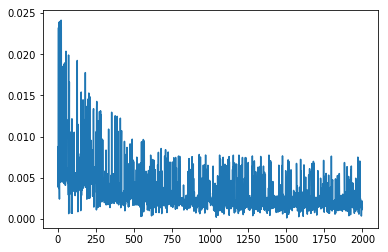

values:
---------------------------
 0.36| 0.53| 0.70| 0.00|
---------------------------
 0.32| 0.00| 0.33| 0.00|
---------------------------
 0.27| 0.12|-0.04|-0.19|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |


In [23]:
# Note: This is policy evaluation, not optimization 

LEARNING_RATE = 0.001

if __name__ == '__main__':
    # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  grid = standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # found by policy_iteration_random on standard_grid
  # MC method won't get exactly this, but should be close
  # values:
  # ---------------------------
  #  0.43|  0.56|  0.72|  0.00|
  # ---------------------------
  #  0.33|  0.00|  0.21|  0.00|
  # ---------------------------
  #  0.25|  0.18|  0.11| -0.17|
  # policy:
  # ---------------------------
  #   R  |   R  |   R  |      |
  # ---------------------------
  #   U  |      |   U  |      |
  # ---------------------------
  #   U  |   L  |   U  |   L  |
  policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'U',
    (2, 1): 'L',
    (2, 2): 'U',
    (2, 3): 'L',
  }
  
  # Randomly initialize theta vector. Our model is V_hat = theta.dot(x), where
  # x = [row, column, row*column, 1] , where the 1 is for the bias term
  theta = np.random.randn(4) / 2 
  
  # Define a function that turns the state into a feature vector x. The only nonlinear 
  # feature is the interaction effect between the i and j coordinate (s[0] and s[1])
  def s2x(s):
    return np.array([s[0] - 1, s[1] - 1.5, s[0]*s[1] - 3, 1])
  
  # Repeat until converge - Main Loop
  deltas = []
  t = 1.0
  for it in range(2000):
    if it % 100 == 0:
      t += 0.01
    alpha = LEARNING_RATE/t # Using decaying learning rate
    
    # Generate an episode using pi. Pattern is the same as before. We play the game, 
    # and get a sequence of states and returns. We then loop through the states and 
    # returns, but instead of updating V, we now update the parameter theta, using the 
    # equation we derived earlier for stochastic gradient descent. 
    biggest_change = 0
    states_and_returns = play_game(grid, policy)
    seen_states = set()
    for s, G in states_and_returns:
      # Check if we have already seen s. This is 'first-visit' MC policy evaluation
      if s not in seen_states:
        old_theta = theta.copy()
        x = s2x(s)
        V_hat = theta.dot(x)
        theta += alpha*(G - V_hat)*x
        biggest_change = max(biggest_change, np.abs(old_theta - theta).sum())
        seen_states.add(s)
    deltas.append(biggest_change)
  
  plt.plot(deltas)
  plt.show()
  
  # Obtain predicted values
  V = {}
  states = grid.all_states()
  for s in states:
    if s in grid.actions:
      V[s] = theta.dot(s2x(s))
    else:
      # terminal state or state we can't otherwise get to
      V[s] = 0

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)
    